In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

red_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
white_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

print('White Wine Data Shape:', red_df.shape)
print('Red Wine Data Shape:', white_df.shape, '\n')
print(red_df.dtypes, '\n')

red_df.head()

White Wine Data Shape: (1599, 12)
Red Wine Data Shape: (4898, 12) 

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object 



,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


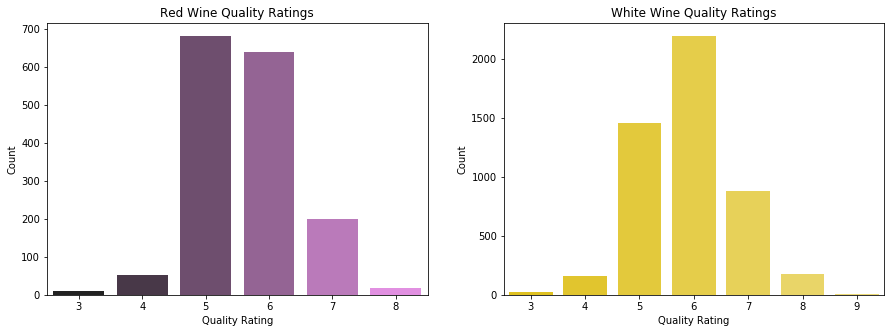

In [3]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
violet_palette = sns.dark_palette('violet')
sns.set_palette(violet_palette)
sns.countplot(red_df.quality, palette=violet_palette)
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.title('Red Wine Quality Ratings')

plt.subplot(122)
gold_palette = sns.light_palette('gold', reverse=True, n_colors=15)
sns.set_palette(gold_palette)
sns.countplot(white_df.quality, palette=gold_palette)
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.title('White Wine Quality Ratings')
plt.show()

C:\Users\zackb\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\zackb\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


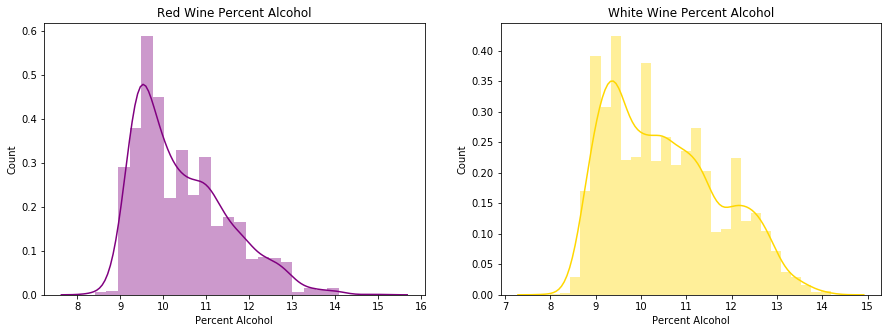

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.distplot(red_df.alcohol, color='purple')
plt.xlabel('Percent Alcohol')
plt.ylabel('Count')
plt.title('Red Wine Percent Alcohol')

plt.subplot(122)
sns.distplot(white_df.alcohol, color='gold')
plt.xlabel('Percent Alcohol')
plt.ylabel('Count')
plt.title('White Wine Percent Alcohol')
plt.show()

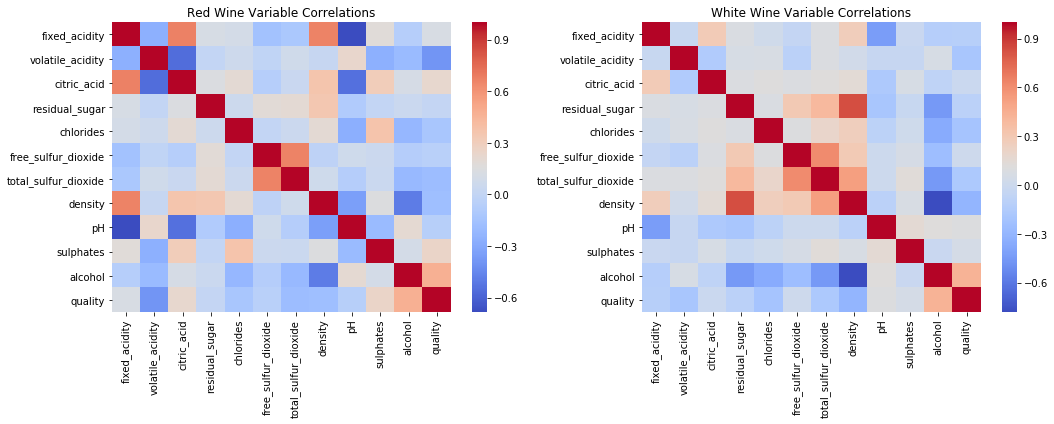

In [5]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.heatmap(red_df.corr(), cmap='coolwarm')
plt.title('Red Wine Variable Correlations')

plt.subplot(122)
sns.heatmap(white_df.corr(), cmap='coolwarm')
plt.title('White Wine Variable Correlations')

plt.tight_layout()
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

red_X = red_df.drop(['residual_sugar', 'fixed_acidity'], 1)
white_X = white_df.drop(['residual_sugar', 'density'], 1)
red_y = red_df.residual_sugar
white_y = white_df.residual_sugar

redX_train, redX_test, redy_train, redy_test = train_test_split(red_X, red_y, test_size=0.3)
whiteX_train, whiteX_test, whitey_train, whitey_test = train_test_split(white_X, white_y, test_size=0.3)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

def lin_reg(xtrain, xtest, ytrain, ytest):
    reg = LinearRegression()
    reg.fit(xtrain, ytrain)
    y_pred = reg.predict(xtest)
    uniques = np.unique(y_pred)
    print('LogReg Accuracy Score: ', accuracy_score(ytest, y_pred))
    print('LogReg 10 Cross Validation Scores: ', cross_val_score(reg, xtrain, ytrain, cv=10))
    print('LogReg F1 Scores: ', f1_score(ytest, y_pred, average=None))
    print('LogReg Labels: ', uniques)

In [18]:
lin_reg(redX_train, redX_test, redy_train, redy_test)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets